# Machine Learning Classification Project

Chosen dataset: Wind Turbine

My classification problem is Fault Type Prediction ; classify what type of fault occurs based on operational metrics, i.e wind speed, power output, temperature of wind turbine's parts
Therefore, I need 2 datasets: scada and fault

In [3]:
# import all important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report

# Retrieve and clean data

In [5]:
# load dataset into jupyter notebook
scada = pd.read_csv("/Users/macbookair/Downloads/pred_maint_wind.csv")
fault = pd.read_csv("/Users/macbookair/Downloads/fault_data.csv")

In [6]:
scada['DateTime'] = pd.to_datetime(scada['DateTime'])
scada.sort_values('DateTime') # sorted because we want to merge
scada

,DateTime,Time,Error,WEC: ava. windspeed,WEC: max. windspeed,WEC: min. windspeed,WEC: ava. Rotation,WEC: max. Rotation,WEC: min. Rotation,WEC: ava. Power,...,Rectifier cabinet temp.,Yaw inverter cabinet temp.,Fan inverter cabinet temp.,Ambient temp.,Tower temp.,Control cabinet temp.,Transformer temp.,RTU: ava. Setpoint 1,Inverter averages,Inverter std dev
0,2014-05-01 00:00:00,1398920448,0,6.9,9.4,2.9,0.00,0.02,0.00,0,...,24,20,25,12,14,24,34,2501,25.272728,1.103713
1,2014-05-01 00:09:00,1398920960,0,5.3,8.9,1.6,0.00,0.01,0.00,0,...,24,20,25,12,14,24,34,2501,25.272728,1.103713
2,2014-05-01 00:20:00,1398921600,0,5.0,9.5,1.4,0.00,0.04,0.00,0,...,24,20,25,12,14,24,34,2501,25.272728,1.103713
3,2014-05-01 00:30:00,1398922240,0,4.4,8.3,1.3,0.00,0.08,0.00,0,...,23,21,25,12,14,24,34,2501,25.272728,1.103713
4,2014-05-01 00:39:00,1398922752,0,5.7,9.7,1.2,0.00,0.05,0.00,0,...,23,21,25,12,14,23,34,2501,25.272728,1.103713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49022,2015-04-08 23:20:00,1428553216,0,3.9,5.5,2.2,6.75,7.40,6.01,147,...,33,23,28,9,17,27,35,3050,24.454546,3.474583
49023,2015-04-08 23:30:00,1428553856,0,3.9,5.6,2.9,6.64,7.06,6.33,128,...,34,23,28,9,17,27,35,3050,24.454546,3.445683
49024,2015-04-08 23:39:00,1428554368,0,4.2,6.7,2.6,7.18,8.83,6.22,163,...,34,23,28,9,18,27,34,3050,24.363636,3.413876
49025,2015-04-08 23:50:00,1428555008,0,4.1,6.6,2.7,7.02,7.94,6.20,160,...,33,23,28,9,17,27,34,3050,24.000000,3.376389


In [7]:
fault['DateTime'] = pd.to_datetime(fault['DateTime'])
fault.sort_values('DateTime') # for clarity
fault

,DateTime,Time,Fault
0,2014-05-14 14:39:44,1.400096e+09,GF
1,2014-05-14 14:50:24,1.400097e+09,GF
2,2014-05-14 14:58:56,1.400098e+09,GF
3,2014-05-14 15:09:36,1.400098e+09,GF
4,2014-05-14 15:20:16,1.400099e+09,GF
...,...,...,...
548,2015-01-14 23:00:48,1.421298e+09,AF
549,2015-01-14 23:09:20,1.421299e+09,AF
550,2015-01-15 22:50:08,1.421384e+09,AF
551,2015-01-15 23:00:48,1.421384e+09,AF


we can see that the time stamps are not aligned

explanation for fault types:
* gf: generator heating fault
* mf: mains failure fault
* ff: feeding fault
* af: air cooling fault
* ef: excitation fault

(0.0, 4.0)

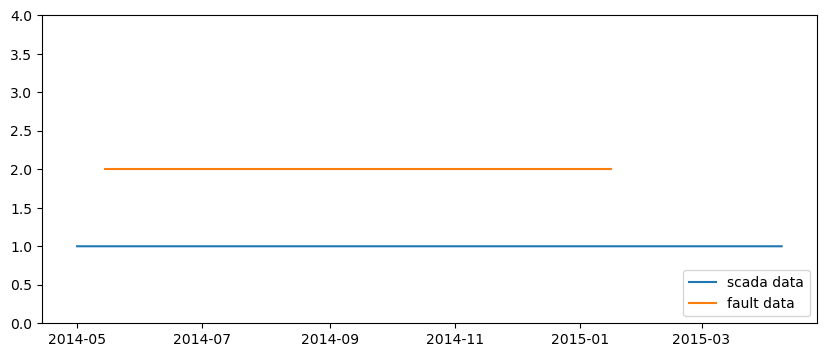

In [10]:
# Plot time span of all data
t_scada = scada.DateTime
t_fault = fault.DateTime


plt.figure(figsize=(10,4))
plt.plot(t_scada, np.full(len(scada), 1), label='scada data')
plt.plot(t_fault, np.full(len(fault), 2), label='fault data')
plt.legend(loc='lower right')
plt.ylim(0,4)

/var/folders/1t/c0th5q0x7cg42qmb36fnm7mw0000gn/T/ipykernel_59650/430992877.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  fault.resample('M', on='DateTime').Fault.count().plot.bar()


<Axes: xlabel='DateTime'>

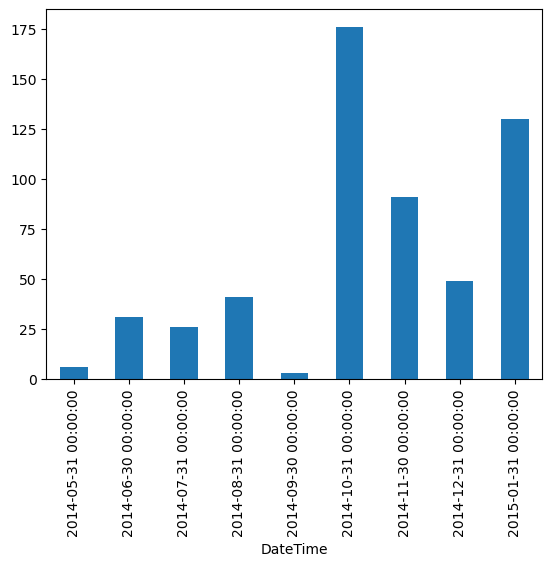

In [11]:
# Plot of number of faults on monthly resampled data
fault.resample('M', on='DateTime').Fault.count().plot.bar()

significant rise in faults in october 2014

In [13]:
def line_format(label):
    """
    Convert time label to the format of pandas line plot
    """
    month = label.month_name()[:3]
    if month == 'Jan':
        month += f'\n{label.year}'
    return month

/var/folders/1t/c0th5q0x7cg42qmb36fnm7mw0000gn/T/ipykernel_59650/686770005.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  fault.resample('M', on='DateTime').Fault.value_counts().unstack().plot.bar(stacked=True, width=0.8, figsize=(10,5), color=c, rot=45,


<Axes: title={'center': 'Wind Turbine Faults'}, xlabel='DateTime', ylabel='Fault Counts'>

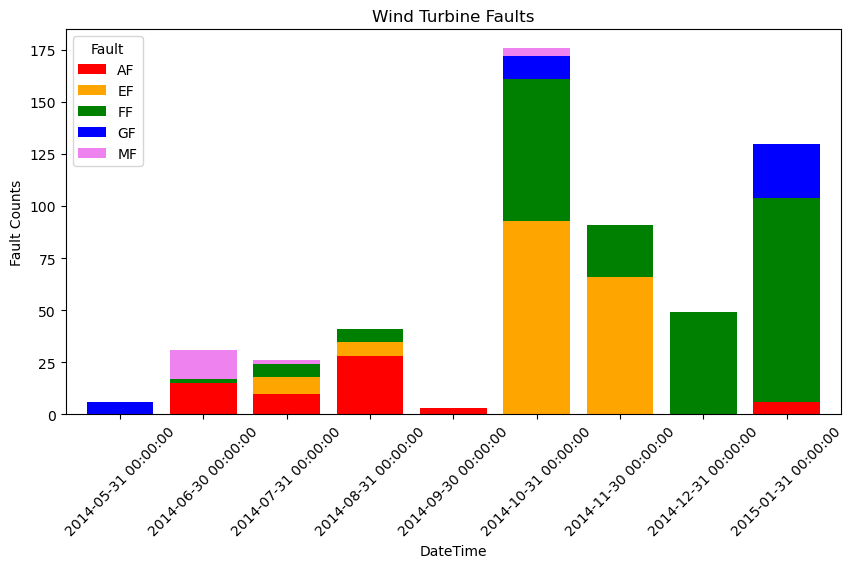

In [14]:
c = ['red', 'orange', 'green', 'blue', 'violet']
fault.resample('M', on='DateTime').Fault.value_counts().unstack().plot.bar(stacked=True, width=0.8, figsize=(10,5), color=c, rot=45,
                                                                              title='Wind Turbine Faults', ylabel='Fault Counts')

In [15]:
# show missing values from each dataset
missing_scada = scada.isnull().sum()
missing_fault = fault.isnull().sum()
print("Missing values in Fault:", missing_fault)
print("Missing values in scada:", missing_scada)

Missing values in Fault: DateTime    0
Time        0
Fault       0
dtype: int64
Missing values in scada: DateTime                 0
Time                     0
Error                    0
WEC: ava. windspeed      0
WEC: max. windspeed      0
                        ..
Control cabinet temp.    0
Transformer temp.        0
RTU: ava. Setpoint 1     0
Inverter averages        0
Inverter std dev         0
Length: 66, dtype: int64


In [16]:
# check for duplicate rows on scada.csv
duplicates = scada.duplicated()
duplicate_count = duplicates.sum()

# check for duplicate rows on fault.csv
duplicates_fault = fault.duplicated()
duplicate_fault_count = duplicates_fault.sum()


print("Number of duplicate rows in scada:", duplicate_count)
print("Number of duplicate rows in fault", duplicate_fault_count)

Number of duplicate rows in scada: 0
Number of duplicate rows in fault 0


no missing values

conclusion: dataset has no missing values and no duplicates

In [19]:
import missingno as msno
merged = scada.merge(fault, on='Time', how='outer')
merged

,DateTime_x,Time,Error,WEC: ava. windspeed,WEC: max. windspeed,WEC: min. windspeed,WEC: ava. Rotation,WEC: max. Rotation,WEC: min. Rotation,WEC: ava. Power,...,Fan inverter cabinet temp.,Ambient temp.,Tower temp.,Control cabinet temp.,Transformer temp.,RTU: ava. Setpoint 1,Inverter averages,Inverter std dev,DateTime_y,Fault
0,2014-05-01 00:00:00,1398920448,0,6.9,9.4,2.9,0.00,0.02,0.00,0,...,25,12,14,24,34,2501,25.272728,1.103713,NaT,NaN
1,2014-05-01 00:09:00,1398920960,0,5.3,8.9,1.6,0.00,0.01,0.00,0,...,25,12,14,24,34,2501,25.272728,1.103713,NaT,NaN
2,2014-05-01 00:20:00,1398921600,0,5.0,9.5,1.4,0.00,0.04,0.00,0,...,25,12,14,24,34,2501,25.272728,1.103713,NaT,NaN
3,2014-05-01 00:30:00,1398922240,0,4.4,8.3,1.3,0.00,0.08,0.00,0,...,25,12,14,24,34,2501,25.272728,1.103713,NaT,NaN
4,2014-05-01 00:39:00,1398922752,0,5.7,9.7,1.2,0.00,0.05,0.00,0,...,25,12,14,23,34,2501,25.272728,1.103713,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49129,2015-04-08 23:20:00,1428553216,0,3.9,5.5,2.2,6.75,7.40,6.01,147,...,28,9,17,27,35,3050,24.454546,3.474583,NaT,NaN
49130,2015-04-08 23:30:00,1428553856,0,3.9,5.6,2.9,6.64,7.06,6.33,128,...,28,9,17,27,35,3050,24.454546,3.445683,NaT,NaN
49131,2015-04-08 23:39:00,1428554368,0,4.2,6.7,2.6,7.18,8.83,6.22,163,...,28,9,18,27,34,3050,24.363636,3.413876,NaT,NaN
49132,2015-04-08 23:50:00,1428555008,0,4.1,6.6,2.7,7.02,7.94,6.20,160,...,28,9,17,27,34,3050,24.000000,3.376389,NaT,NaN


now, a lot of rows in Fault column are NaN, because on these days there are no encounter of fault

In [21]:
# Replace records that has no fault label (NaN) as 'NF' (no fault)
merged['Fault'] = merged['Fault'].replace(np.nan, 'NF')

merged

,DateTime_x,Time,Error,WEC: ava. windspeed,WEC: max. windspeed,WEC: min. windspeed,WEC: ava. Rotation,WEC: max. Rotation,WEC: min. Rotation,WEC: ava. Power,...,Fan inverter cabinet temp.,Ambient temp.,Tower temp.,Control cabinet temp.,Transformer temp.,RTU: ava. Setpoint 1,Inverter averages,Inverter std dev,DateTime_y,Fault
0,2014-05-01 00:00:00,1398920448,0,6.9,9.4,2.9,0.00,0.02,0.00,0,...,25,12,14,24,34,2501,25.272728,1.103713,NaT,NF
1,2014-05-01 00:09:00,1398920960,0,5.3,8.9,1.6,0.00,0.01,0.00,0,...,25,12,14,24,34,2501,25.272728,1.103713,NaT,NF
2,2014-05-01 00:20:00,1398921600,0,5.0,9.5,1.4,0.00,0.04,0.00,0,...,25,12,14,24,34,2501,25.272728,1.103713,NaT,NF
3,2014-05-01 00:30:00,1398922240,0,4.4,8.3,1.3,0.00,0.08,0.00,0,...,25,12,14,24,34,2501,25.272728,1.103713,NaT,NF
4,2014-05-01 00:39:00,1398922752,0,5.7,9.7,1.2,0.00,0.05,0.00,0,...,25,12,14,23,34,2501,25.272728,1.103713,NaT,NF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49129,2015-04-08 23:20:00,1428553216,0,3.9,5.5,2.2,6.75,7.40,6.01,147,...,28,9,17,27,35,3050,24.454546,3.474583,NaT,NF
49130,2015-04-08 23:30:00,1428553856,0,3.9,5.6,2.9,6.64,7.06,6.33,128,...,28,9,17,27,35,3050,24.454546,3.445683,NaT,NF
49131,2015-04-08 23:39:00,1428554368,0,4.2,6.7,2.6,7.18,8.83,6.22,163,...,28,9,18,27,34,3050,24.363636,3.413876,NaT,NF
49132,2015-04-08 23:50:00,1428555008,0,4.1,6.6,2.7,7.02,7.94,6.20,160,...,28,9,17,27,34,3050,24.000000,3.376389,NaT,NF


# Exploratory Data Analysis

1. Summarize Data
2. Plot Target Variable
3. Explore Key Features

# 1. Summarize Data

In [25]:
merged.info()
merged.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49134 entries, 0 to 49133
Data columns (total 68 columns):
 #   Column                                             Non-Null Count  Dtype         
---  ------                                             --------------  -----         
 0   DateTime_x                                         49134 non-null  datetime64[ns]
 1   Time                                               49134 non-null  int64         
 2   Error                                              49134 non-null  int64         
 3   WEC: ava. windspeed                                49134 non-null  float64       
 4   WEC: max. windspeed                                49134 non-null  float64       
 5   WEC: min. windspeed                                49134 non-null  float64       
 6   WEC: ava. Rotation                                 49134 non-null  float64       
 7   WEC: max. Rotation                                 49134 non-null  float64       
 8   WEC: min. Rotati

,DateTime_x,Time,Error,WEC: ava. windspeed,WEC: max. windspeed,WEC: min. windspeed,WEC: ava. Rotation,WEC: max. Rotation,WEC: min. Rotation,WEC: ava. Power,...,Yaw inverter cabinet temp.,Fan inverter cabinet temp.,Ambient temp.,Tower temp.,Control cabinet temp.,Transformer temp.,RTU: ava. Setpoint 1,Inverter averages,Inverter std dev,DateTime_y
count,49134,4.913400e+04,49134.000000,49134.000000,49134.000000,49134.000000,49134.000000,49134.000000,49134.000000,49134.000000,...,49134.000000,49134.000000,49134.000000,49134.000000,49134.000000,49134.000000,49134.000000,49134.000000,49134.000000,553
mean,2014-10-19 17:12:52.651117312,1.413758e+09,0.936704,6.888660,9.360534,12.234400,8.684788,9.558653,8.512372,945.153702,...,24.328489,28.807343,13.385822,23.130236,31.782900,44.033867,2988.760064,27.843859,1.855149,2014-10-27 17:55:25.801084928
min,2014-05-01 00:00:00,1.398920e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-19.000000,0.000000,-14.000000,0.000000,2014-05-14 14:39:44
25%,2014-07-26 01:40:45,1.406357e+09,0.000000,4.200000,5.800000,2.600000,6.330000,6.750000,5.870000,87.000000,...,20.000000,25.000000,10.000000,19.000000,27.000000,37.000000,3050.000000,24.363636,1.206045,2014-10-08 07:09:36
50%,2014-10-19 03:34:30,1.413708e+09,0.000000,6.500000,8.600000,4.400000,8.980000,10.070000,7.850000,538.000000,...,25.000000,29.000000,13.000000,24.000000,33.000000,43.000000,3050.000000,28.454546,1.566699,2014-10-28 06:29:04
75%,2015-01-13 09:27:15,1.421163e+09,0.000000,8.900000,11.800000,6.300000,11.930000,13.570000,10.390000,1562.000000,...,28.000000,33.000000,17.000000,28.000000,36.000000,48.000000,3050.000000,31.818182,2.370270,2014-12-08 07:30:40
max,2015-04-09 00:00:00,1.428556e+09,246.000000,32.099998,51.099998,6553.500000,14.730000,18.910000,655.349976,3071.000000,...,38.000000,44.000000,35.000000,36.000000,45.000000,71.000000,3050.000000,42.545456,23.512859,2015-01-15 23:09:20
std,NaN,8.552800e+06,14.426473,3.706139,5.175093,222.943841,4.143982,4.484337,22.371901,1010.560943,...,4.917172,5.181662,5.243108,6.362204,6.385861,10.436168,171.910638,5.600262,1.268842,NaN


In [26]:
# target variable
merged.Fault.value_counts()

Fault
NF    48581
FF      254
EF      174
AF       62
GF       43
MF       20
Name: count, dtype: int64

imbalanced data set due to NF being majority

In [28]:
# undersampling nf to combat imbalance
from sklearn.utils import resample

#separate nf and fault rows
nf_rows = merged[merged['Fault'] == 'NF']
fault_rows = merged[merged['Fault'] != 'NF']

# downsample nf rows to match the siye of fault rows
nf_sample = resample(nf_rows,
                     replace=False,
                     n_samples=300,
                     random_state=42)
# combine sampled nf rows with fault rows
merged_new = pd.concat([nf_sample, fault_rows])
merged_new

,DateTime_x,Time,Error,WEC: ava. windspeed,WEC: max. windspeed,WEC: min. windspeed,WEC: ava. Rotation,WEC: max. Rotation,WEC: min. Rotation,WEC: ava. Power,...,Fan inverter cabinet temp.,Ambient temp.,Tower temp.,Control cabinet temp.,Transformer temp.,RTU: ava. Setpoint 1,Inverter averages,Inverter std dev,DateTime_y,Fault
7340,2014-06-21 19:29:00,1403396992,0,3.5,4.600000,2.4,6.37,6.64,6.16,87,...,40,20,26,36,45,3050,34.272728,3.227721,NaT,NF
949,2014-05-07 16:39:00,1399498752,0,5.3,15.000000,3.0,0.00,0.00,0.00,0,...,26,16,15,24,33,2501,24.454546,0.934199,NaT,NF
37369,2015-01-17 00:00:00,1421474432,0,9.2,10.800000,8.1,13.48,13.95,12.92,2078,...,20,3,18,25,40,3050,19.090910,1.445998,NaT,NF
15200,2014-08-15 07:30:00,1408105856,0,7.2,9.600000,5.0,10.45,11.62,9.70,998,...,30,21,30,37,48,3050,30.545454,1.035726,NaT,NF
42798,2015-02-23 22:30:00,1424752256,0,14.9,20.900000,11.2,14.69,15.54,14.13,3060,...,22,6,28,39,67,3050,28.272728,1.902152,NaT,NF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37075,2015-01-14 23:00:00,1421298048,0,13.5,22.000000,7.7,14.69,15.19,13.83,2736,...,24,8,29,35,57,3050,25.909090,1.814086,2015-01-14 23:00:48,AF
37076,2015-01-14 23:09:00,1421298560,0,15.5,25.700001,1.9,2.53,14.67,0.00,20,...,23,7,22,35,57,3050,28.181818,1.834022,2015-01-14 23:09:20,AF
37218,2015-01-15 22:50:00,1421383808,0,8.4,9.700000,6.8,12.79,13.30,11.64,1667,...,21,5,21,28,42,3050,20.909090,1.300350,2015-01-15 22:50:08,AF
37219,2015-01-15 23:00:00,1421384448,0,8.1,9.800000,6.0,11.71,13.27,9.99,1311,...,20,5,21,28,42,3050,20.909090,1.300350,2015-01-15 23:00:48,AF


In [29]:
# target variable
merged_new.Fault.value_counts()

Fault
NF    300
FF    254
EF    174
AF     62
GF     43
MF     20
Name: count, dtype: int64

In [30]:
# missing values
missing_values = merged_new.isnull().sum()

print("missing values in df:", missing_values)

missing values in df: DateTime_x                0
Time                      0
Error                     0
WEC: ava. windspeed       0
WEC: max. windspeed       0
                       ... 
RTU: ava. Setpoint 1      0
Inverter averages         0
Inverter std dev          0
DateTime_y              300
Fault                     0
Length: 68, dtype: int64


In [31]:
# Check if 'DateTime_y' exists in the columns
print('DateTime_y' in merged_new.columns)

True


In [32]:
# dropping irrelevant features
merged_final = merged_new.drop(columns=['DateTime_x', 'DateTime_y', 'Time', 'Error', 'WEC: max. windspeed', 'WEC: min. windspeed',
                                       'WEC: max. Rotation','WEC: min. Rotation', 'WEC: max. Power', 'WEC: min. Power','WEC: Operating Hours',
                                       'WEC: Production kWh', 'WEC: Production minutes', 'WEC: max. reactive Power', 'WEC: min. reactive Power' ])
merged_final

,WEC: ava. windspeed,WEC: ava. Rotation,WEC: ava. Power,WEC: ava. Nacel position including cable twisting,WEC: ava. reactive Power,WEC: ava. available P from wind,WEC: ava. available P technical reasons,WEC: ava. Available P force majeure reasons,WEC: ava. Available P force external reasons,WEC: ava. blade angle A,...,Yaw inverter cabinet temp.,Fan inverter cabinet temp.,Ambient temp.,Tower temp.,Control cabinet temp.,Transformer temp.,RTU: ava. Setpoint 1,Inverter averages,Inverter std dev,Fault
7340,3.5,6.37,87,171,32,87,87,87,87,1.000000,...,36,40,20,26,36,45,3050,34.272728,3.227721,NF
949,5.3,0.00,0,-52,0,464,464,0,459,91.930000,...,22,26,16,15,24,33,2501,24.454546,0.934199,NF
37369,9.2,13.48,2078,-66,173,2079,2079,2079,2079,1.000000,...,16,20,3,18,25,40,3050,19.090910,1.445998,NF
15200,7.2,10.45,998,-376,64,1008,1008,1008,1008,1.000000,...,24,30,21,30,37,48,3050,30.545454,1.035726,NF
42798,14.9,14.69,3060,-68,296,3060,3060,3060,3060,12.780000,...,19,22,6,28,39,67,3050,28.272728,1.902152,NF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37075,13.5,14.69,2736,-78,238,3014,2739,3014,3014,8.260000,...,21,24,8,29,35,57,3050,25.909090,1.814086,AF
37076,15.5,2.53,20,-76,4,2581,438,2581,2581,66.849998,...,21,23,7,22,35,57,3050,28.181818,1.834022,AF
37218,8.4,12.79,1667,-66,145,1675,1675,1675,1675,1.000000,...,17,21,5,21,28,42,3050,20.909090,1.300350,AF
37219,8.1,11.71,1311,-53,111,1317,1317,1317,1317,1.000000,...,16,20,5,21,28,42,3050,20.909090,1.300350,AF


# plotting target variable

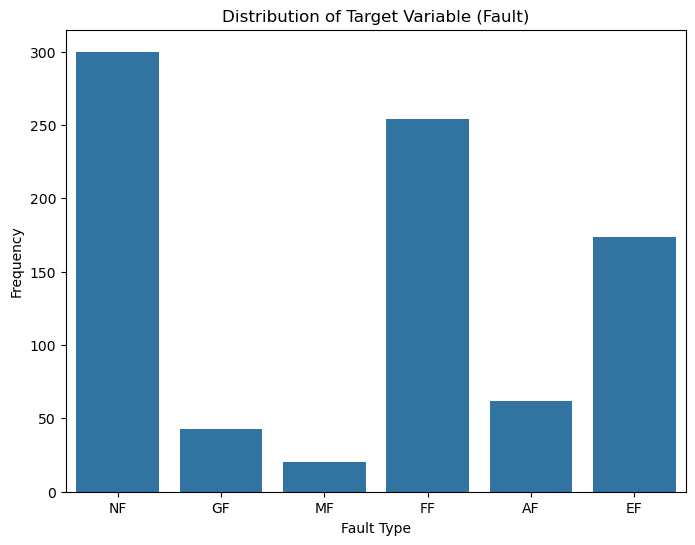

In [34]:
# visualize class distribution in our target variable

plt.figure(figsize=(8, 6))
sns.countplot(x=merged_final['Fault'])
plt.title('Distribution of Target Variable (Fault)')
plt.xlabel('Fault Type')
plt.ylabel('Frequency')
plt.show()

# Correlation Analysis

0.6505355985599545


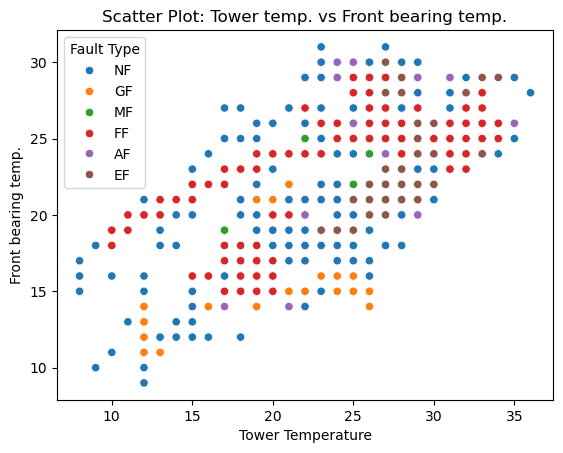

In [36]:
correlation = merged_new['Tower temp.'].corr(merged_new['Front bearing temp.'])
print(correlation)

sns.scatterplot(x='Tower temp.', y='Front bearing temp.', hue='Fault', data=merged_new)
plt.title('Scatter Plot: Tower temp. vs Front bearing temp.')
plt.xlabel('Tower Temperature')
plt.ylabel('Front bearing temp.')
plt.legend(title='Fault Type')
plt.show()

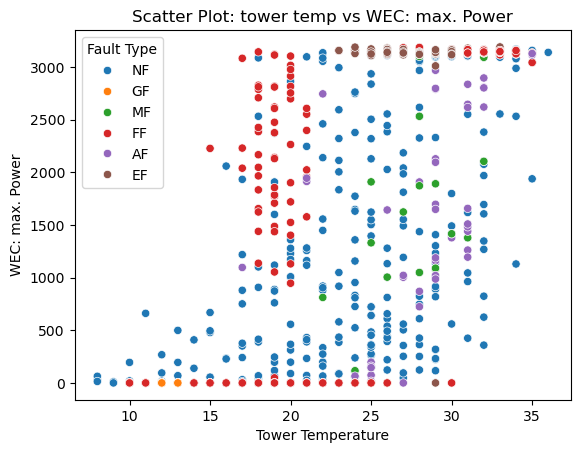

In [37]:
# scatter plot between features

sns.scatterplot(x='Tower temp.', y='WEC: max. Power', hue='Fault', data=merged_new)
plt.title('Scatter Plot: tower temp vs WEC: max. Power')
plt.xlabel('Tower Temperature')
plt.ylabel('WEC: max. Power')
plt.legend(title='Fault Type')
plt.show()

Correlation Analysis doesn't really help us in filtering out redundant features since some of the variables do not have a linear relationship. 

/var/folders/1t/c0th5q0x7cg42qmb36fnm7mw0000gn/T/ipykernel_59650/1764463764.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Fault Type')


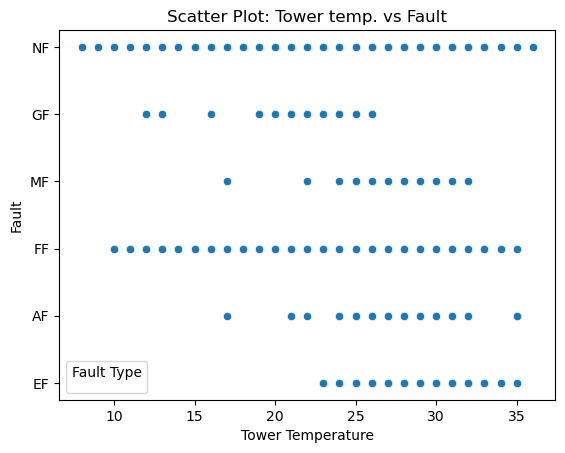

In [39]:
sns.scatterplot(x='Tower temp.', y='Fault', data=merged_new)
plt.title('Scatter Plot: Tower temp. vs Fault')
plt.xlabel('Tower Temperature')
plt.ylabel('Fault')
plt.legend(title='Fault Type')
plt.show()

# Model Fitting

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [42]:
# load and prep data
X = merged_final.drop(columns=['Fault']) #Features
y = merged_final['Fault'] #Target Variable

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree

In [44]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_predict = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predict)
print(f"Decision Tree Accuracy: {dt_accuracy:2f}")
print(classification_report(y_test, dt_predict))

Decision Tree Accuracy: 0.608187
              precision    recall  f1-score   support

          AF       0.50      0.40      0.44        15
          EF       0.39      0.43      0.41        35
          FF       0.54      0.63      0.58        46
          GF       0.90      1.00      0.95         9
          MF       0.20      0.25      0.22         4
          NF       0.85      0.71      0.77        62

    accuracy                           0.61       171
   macro avg       0.56      0.57      0.56       171
weighted avg       0.63      0.61      0.61       171



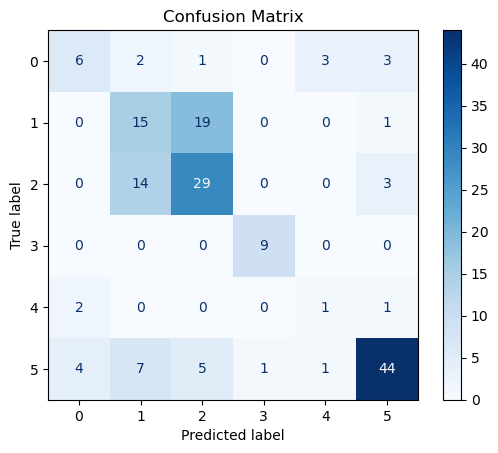

In [45]:
# Confusion Matrix Decision Tree pre Tuning
conf_matrix_dt = confusion_matrix(y_test, dt_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_dt)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [46]:
# tuning dt
from sklearn.model_selection import GridSearchCV

# define hyperparam grid
param_grid_dt = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# grid search
grid_search_dt = GridSearchCV(estimator=dt_model, param_grid=param_grid_dt, scoring='f1_macro', cv=5, verbose=1)
grid_search_dt.fit(X_train, y_train)

# best params
print("Best Parameter for Decision Tree:", grid_search_dt.best_params_)
print("Best F-1 Score for Decision Tree:", grid_search_dt.best_score_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameter for Decision Tree: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best F-1 Score for Decision Tree: 0.6020913442394327


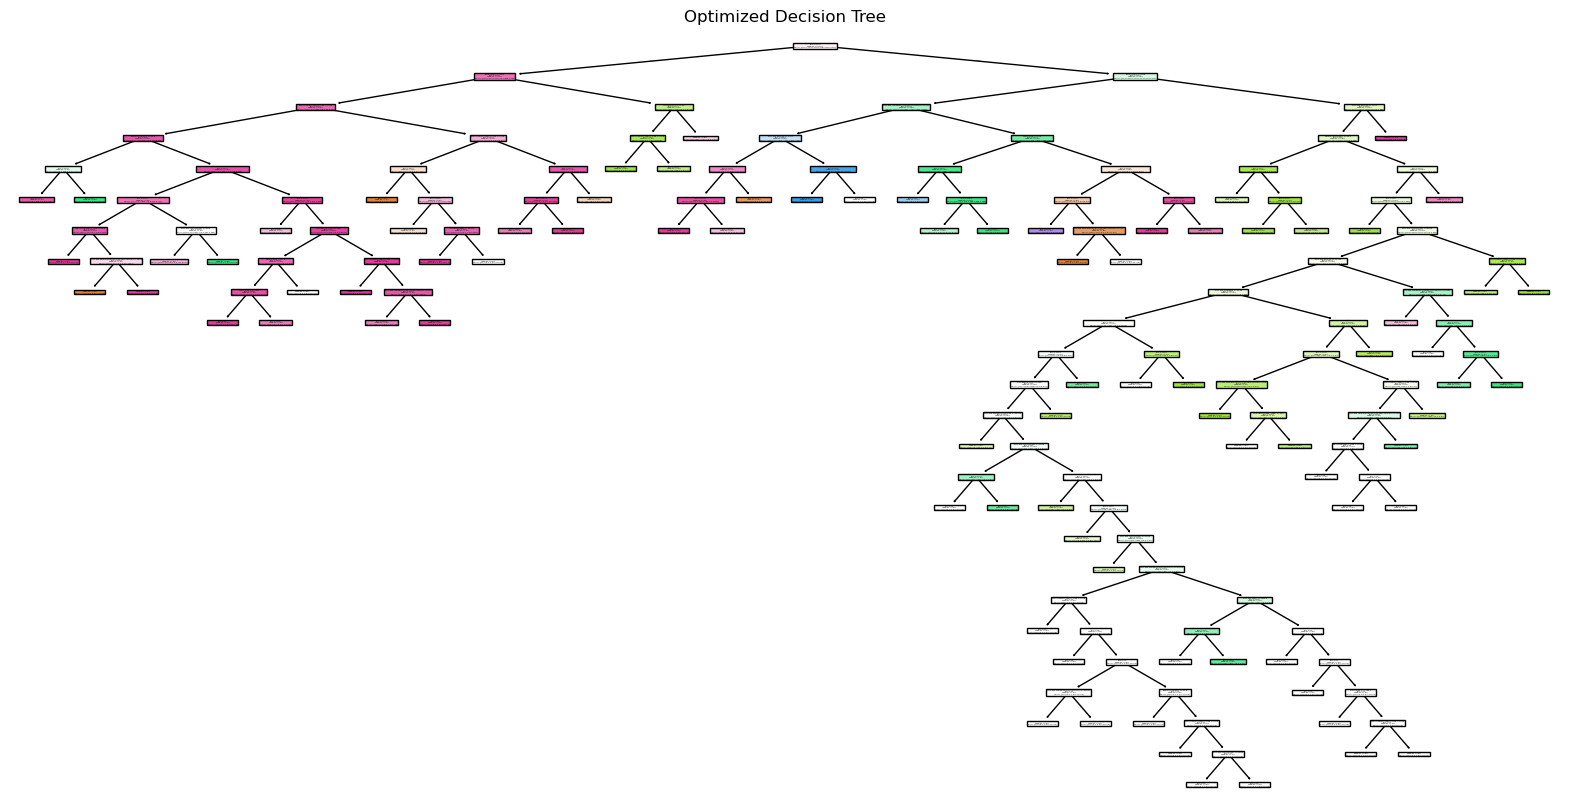

In [47]:
# visualize dt
from sklearn import tree
plt.figure(figsize=(20, 10))
tree.plot_tree(grid_search_dt.best_estimator_, filled=True, feature_names=X_train.columns.tolist(), proportion=True)
plt.title('Optimized Decision Tree')
plt.show()

In [48]:
# predict with best model
dt_best = grid_search_dt.best_estimator_.predict(X_test)

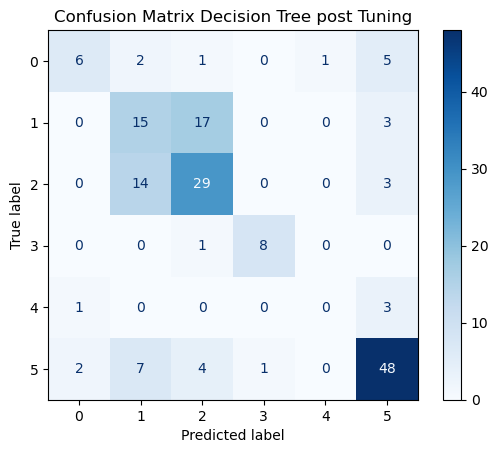

In [49]:
# confusion matrix for best model
conf_matrix = confusion_matrix(y_test, dt_best)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix Decision Tree post Tuning')
plt.show()

In [50]:
# classification report for best model
best_dt_report = classification_report(y_test, dt_best)
dt_best_accuracy = accuracy_score(y_test, dt_best)
print(f"Decision Tree Accuracy post Tuning: {dt_best_accuracy:2f}")
print(best_dt_report)

Decision Tree Accuracy post Tuning: 0.619883
              precision    recall  f1-score   support

          AF       0.67      0.40      0.50        15
          EF       0.39      0.43      0.41        35
          FF       0.56      0.63      0.59        46
          GF       0.89      0.89      0.89         9
          MF       0.00      0.00      0.00         4
          NF       0.77      0.77      0.77        62

    accuracy                           0.62       171
   macro avg       0.55      0.52      0.53       171
weighted avg       0.62      0.62      0.61       171



# Random Forest

In [52]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predict = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predict)
print(f"Random Forest Accuracy: {rf_accuracy:2f}")
print(classification_report(y_test, rf_predict))

Random Forest Accuracy: 0.695906
              precision    recall  f1-score   support

          AF       0.67      0.27      0.38        15
          EF       0.47      0.43      0.45        35
          FF       0.59      0.72      0.65        46
          GF       1.00      1.00      1.00         9
          MF       0.00      0.00      0.00         4
          NF       0.89      0.94      0.91        62

    accuracy                           0.70       171
   macro avg       0.60      0.56      0.56       171
weighted avg       0.69      0.70      0.68       171



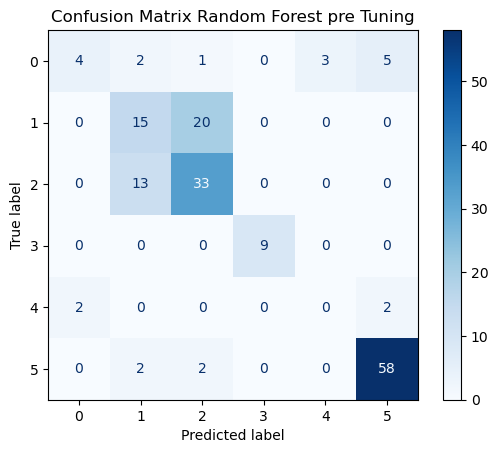

In [53]:
# Confusion Matrix Random Forest pre Tuning
conf_matrix_rf = confusion_matrix(y_test, rf_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rf)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix Random Forest pre Tuning')
plt.show()

In [54]:
# tuning rf
param_grid_rf = {
    'n_estimators': [50,100,150],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}

# init model
rf_model = RandomForestClassifier(random_state=42)

# grid search
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, scoring='f1_macro', cv=5, verbose=1, n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

print("Best Parameter for Random Forest:", grid_search_rf.best_params_)
print("Best F-1 Score for Random Forest:", grid_search_rf.best_score_)

Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best Parameter for Random Forest: {'bootstrap': False, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best F-1 Score for Random Forest: 0.6293232067003209


In [55]:
# predict with best model
rf_best = grid_search_rf.best_estimator_.predict(X_test)

In [56]:
# classification report for best model
rf_best_accuracy = accuracy_score(y_test, rf_best)
best_rf_report = classification_report(y_test, rf_best, zero_division=0)
print(f"Random Forest Accuracy post Tuning: {rf_best_accuracy:2f}")
print(best_rf_report)

Random Forest Accuracy post Tuning: 0.713450
              precision    recall  f1-score   support

          AF       0.71      0.33      0.45        15
          EF       0.48      0.46      0.47        35
          FF       0.62      0.72      0.67        46
          GF       1.00      1.00      1.00         9
          MF       0.00      0.00      0.00         4
          NF       0.89      0.95      0.92        62

    accuracy                           0.71       171
   macro avg       0.62      0.58      0.59       171
weighted avg       0.71      0.71      0.70       171



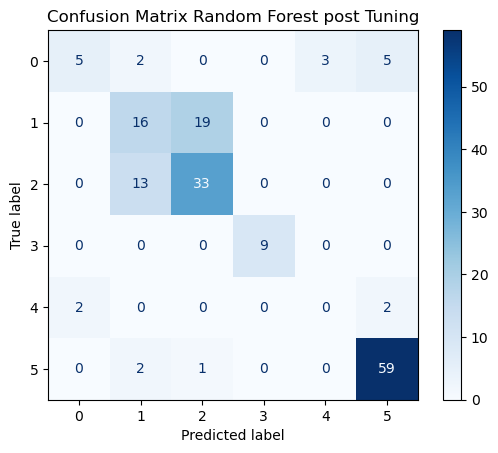

In [57]:
# Confusion Matrix post Tuning
conf_matrix_rf = confusion_matrix(y_test, rf_best)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rf)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix Random Forest post Tuning')
plt.show()

In [58]:
# Random Forest Metrics pre Tuning
print(f"Random Forest Accuracy pre Tuning: {rf_accuracy:2f}")
print(classification_report(y_test, rf_predict))

# Random Forest Metrics post Tuning
print(f"Random Forest Accuracy post Tuning: {rf_best_accuracy:2f}")
print(best_rf_report)

Random Forest Accuracy pre Tuning: 0.695906
              precision    recall  f1-score   support

          AF       0.67      0.27      0.38        15
          EF       0.47      0.43      0.45        35
          FF       0.59      0.72      0.65        46
          GF       1.00      1.00      1.00         9
          MF       0.00      0.00      0.00         4
          NF       0.89      0.94      0.91        62

    accuracy                           0.70       171
   macro avg       0.60      0.56      0.56       171
weighted avg       0.69      0.70      0.68       171

Random Forest Accuracy post Tuning: 0.713450
              precision    recall  f1-score   support

          AF       0.71      0.33      0.45        15
          EF       0.48      0.46      0.47        35
          FF       0.62      0.72      0.67        46
          GF       1.00      1.00      1.00         9
          MF       0.00      0.00      0.00         4
          NF       0.89      0.95      0.92

# XGBoost

In [60]:
# encoding because xgboost does not take in string values
from sklearn.preprocessing import OneHotEncoder

# Initialize the encoder
onehot_encoder = OneHotEncoder(sparse_output=False)

# Reshape the target array to 2D (required for OneHotEncoder)
y_reshaped = np.array(y).reshape(-1, 1)

# Fit and transform the target variable
y_encoded = onehot_encoder.fit_transform(y_reshaped)

# Print to confirm encoding
print("One-Hot Encoded Target:\n", y_encoded)

One-Hot Encoded Target:
 [[0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 ...
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]]


In [61]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

xgb_model = XGBClassifier(eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)

# predict class probabilities on the test set
y_pred_prob = xgb_model.predict_proba(X_test)

# convert predicted probs to class labels
y_pred_class = y_test.argmax(axis=1)

# evaluate  accuracy by comparing predicted labels with actual labels 
# convert the one hot encoded y_test back to labels
y_test_class = y_test.argmax(axis=1)

# compute accuracy
xgb_accuracy = accuracy_score(y_test_class, y_pred_class)
print(f"XGBoost Accuracy: {xgb_accuracy:.2f}")

XGBoost Accuracy: 1.00


In [62]:
report = classification_report(y_test_class, y_pred_class, target_names=onehot_encoder.categories_[0])
print(report)

              precision    recall  f1-score   support

          AF       1.00      1.00      1.00        15
          EF       1.00      1.00      1.00        35
          FF       1.00      1.00      1.00        46
          GF       1.00      1.00      1.00         9
          MF       1.00      1.00      1.00         4
          NF       1.00      1.00      1.00        62

    accuracy                           1.00       171
   macro avg       1.00      1.00      1.00       171
weighted avg       1.00      1.00      1.00       171



XGBoost model overfits.

In [64]:
# tuning xgb
param_grid_xgb = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 1, 5]
}

# init model
xgb_model = XGBClassifier(eval_metric='mlogloss', random_state=42)

# grid search
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, scoring='f1_macro', cv=5, verbose=1, n_jobs=-1)
grid_search_xgb.fit(X_train, y_train)

print("Best Parameter for XGB:", grid_search_xgb.best_params_)
print("Best F-1 Score for XGB:", grid_search_xgb.best_score_)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


/opt/anaconda3/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameter for XGB: {'colsample_bytree': 0.8, 'gamma': 1, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'subsample': 1.0}
Best F-1 Score for XGB: 0.6181701345809199


In [65]:
from sklearn.metrics import accuracy_score

# Get the best model
best_xgb_model = grid_search_xgb.best_estimator_

# Predict on the test set
y_pred = best_xgb_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on Test Data:", accuracy)

# Generate classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Accuracy on Test Data: 0.631578947368421
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.27      0.40        15
           1       0.53      0.57      0.55        35
           2       0.83      0.65      0.73        46
           3       1.00      0.89      0.94         9
           4       0.00      0.00      0.00         4
           5       0.83      0.84      0.83        62

   micro avg       0.75      0.67      0.71       171
   macro avg       0.66      0.54      0.58       171
weighted avg       0.75      0.67      0.70       171
 samples avg       0.65      0.67      0.65       171



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


From testing 3 models; Decision Tree, Random Forest, and XGBoost, Random Forest is the best model because its metrics are the best among the three. XGBoost seems to learn the training set and generalize very poorly on the test set. 

# Feature Importance

In [68]:
X_train.columns

Index(['WEC: ava. windspeed', 'WEC: ava. Rotation', 'WEC: ava. Power',
       'WEC: ava. Nacel position including cable twisting',
       'WEC: ava. reactive Power', 'WEC: ava. available P from wind',
       'WEC: ava. available P technical reasons',
       'WEC: ava. Available P force majeure reasons',
       'WEC: ava. Available P force external reasons',
       'WEC: ava. blade angle A', 'Sys 1 inverter 1 cabinet temp.',
       'Sys 1 inverter 2 cabinet temp.', 'Sys 1 inverter 3 cabinet temp.',
       'Sys 1 inverter 4 cabinet temp.', 'Sys 1 inverter 5 cabinet temp.',
       'Sys 1 inverter 6 cabinet temp.', 'Sys 1 inverter 7 cabinet temp.',
       'Sys 2 inverter 1 cabinet temp.', 'Sys 2 inverter 2 cabinet temp.',
       'Sys 2 inverter 3 cabinet temp.', 'Sys 2 inverter 4 cabinet temp.',
       'Sys 2 inverter 5 cabinet temp.', 'Sys 2 inverter 6 cabinet temp.',
       'Sys 2 inverter 7 cabinet temp.', 'Spinner temp.',
       'Front bearing temp.', 'Rear bearing temp.',
       'Pitc

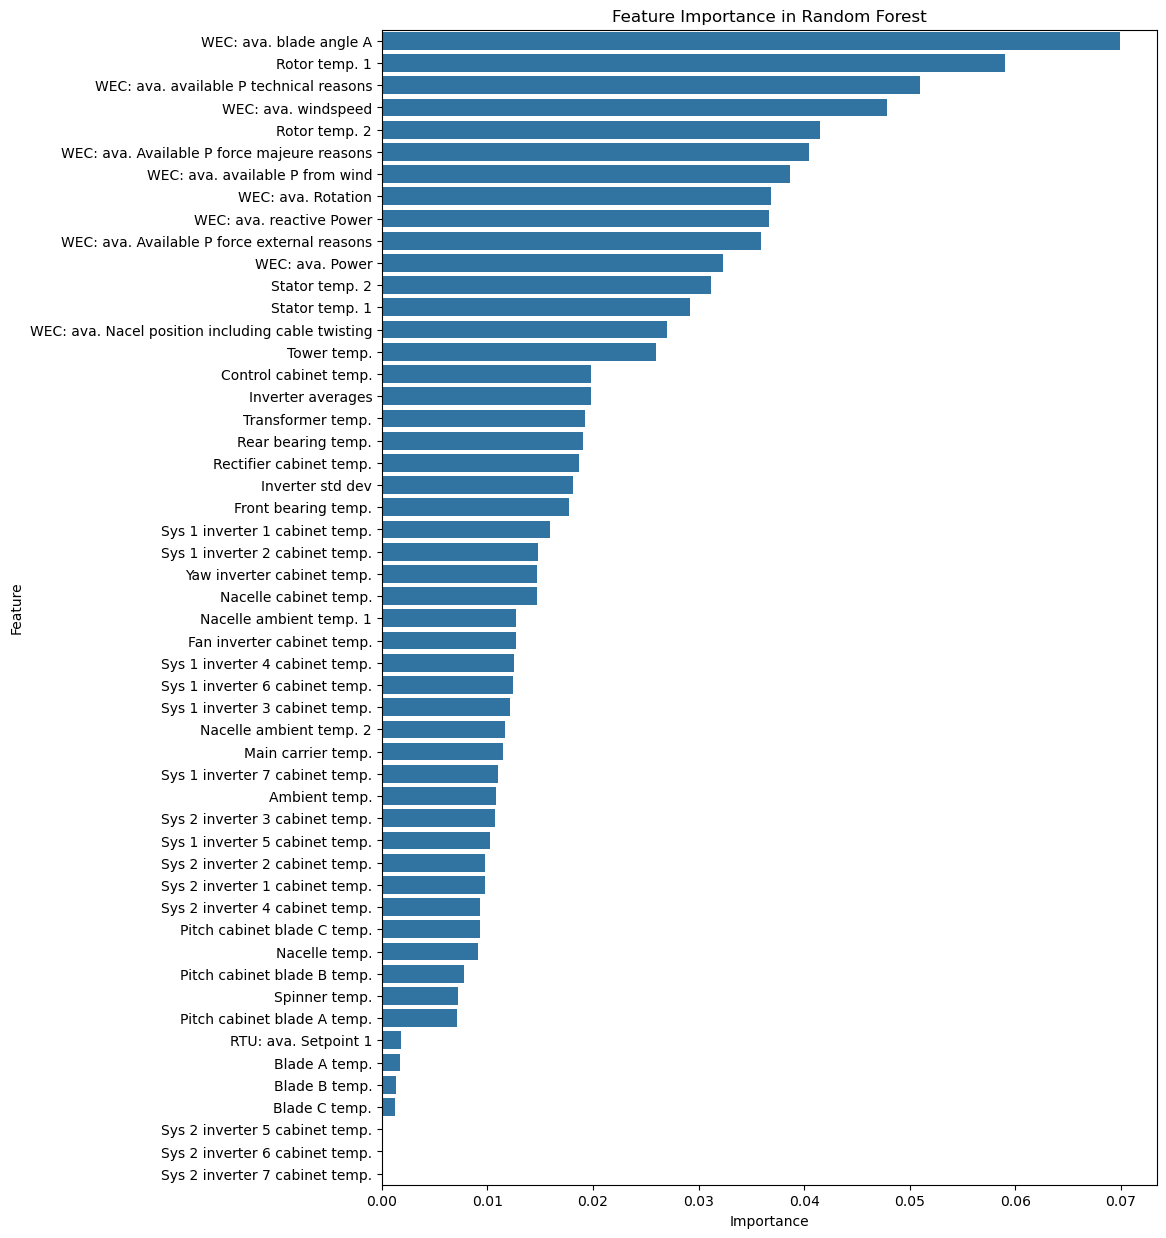

In [69]:
# display feature importance

features = X_train.columns
rf_model_feature = RandomForestClassifier(random_state=42)
rf_model_feature.fit(X_train, y_train)
importance = rf_model_feature.feature_importances_
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,15))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance in Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [70]:
# Retraining Random Forest after dropping 'redundant' features
merged_important = merged_final.drop(columns=['Sys 2 inverter 5 cabinet temp.', 'Sys 2 inverter 6 cabinet temp.',
                                             'Sys 2 inverter 7 cabinet temp.', 'Blade C temp.', 'Blade B temp.', 'Blade A temp.',
                                             'RTU: ava. Setpoint 1', 'Spinner temp.', 'Pitch cabinet blade A temp.', 'Pitch cabinet blade B temp.'])
merged_important

,WEC: ava. windspeed,WEC: ava. Rotation,WEC: ava. Power,WEC: ava. Nacel position including cable twisting,WEC: ava. reactive Power,WEC: ava. available P from wind,WEC: ava. available P technical reasons,WEC: ava. Available P force majeure reasons,WEC: ava. Available P force external reasons,WEC: ava. blade angle A,...,Rectifier cabinet temp.,Yaw inverter cabinet temp.,Fan inverter cabinet temp.,Ambient temp.,Tower temp.,Control cabinet temp.,Transformer temp.,Inverter averages,Inverter std dev,Fault
7340,3.5,6.37,87,171,32,87,87,87,87,1.000000,...,39,36,40,20,26,36,45,34.272728,3.227721,NF
949,5.3,0.00,0,-52,0,464,464,0,459,91.930000,...,25,22,26,16,15,24,33,24.454546,0.934199,NF
37369,9.2,13.48,2078,-66,173,2079,2079,2079,2079,1.000000,...,21,16,20,3,18,25,40,19.090910,1.445998,NF
15200,7.2,10.45,998,-376,64,1008,1008,1008,1008,1.000000,...,27,24,30,21,30,37,48,30.545454,1.035726,NF
42798,14.9,14.69,3060,-68,296,3060,3060,3060,3060,12.780000,...,23,19,22,6,28,39,67,28.272728,1.902152,NF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37075,13.5,14.69,2736,-78,238,3014,2739,3014,3014,8.260000,...,27,21,24,8,29,35,57,25.909090,1.814086,AF
37076,15.5,2.53,20,-76,4,2581,438,2581,2581,66.849998,...,27,21,23,7,22,35,57,28.181818,1.834022,AF
37218,8.4,12.79,1667,-66,145,1675,1675,1675,1675,1.000000,...,23,17,21,5,21,28,42,20.909090,1.300350,AF
37219,8.1,11.71,1311,-53,111,1317,1317,1317,1317,1.000000,...,23,16,20,5,21,28,42,20.909090,1.300350,AF


In [71]:
rf_model_important = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_important.fit(X_train, y_train)
rf_predict_important = rf_model_important.predict(X_test)
rf_accuracy_important = accuracy_score(y_test, rf_predict_important)
print(f"Random Forest Accuracy: {rf_accuracy_important:2f}")
print(classification_report(y_test, rf_predict_important))

Random Forest Accuracy: 0.666667
              precision    recall  f1-score   support

           0       0.50      0.13      0.21        15
           1       0.48      0.43      0.45        35
           2       0.61      0.72      0.66        46
           3       1.00      0.89      0.94         9
           4       0.00      0.00      0.00         4
           5       0.95      0.90      0.93        62

   micro avg       0.72      0.67      0.69       171
   macro avg       0.59      0.51      0.53       171
weighted avg       0.70      0.67      0.67       171
 samples avg       0.67      0.67      0.67       171



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


after dropping columns accuracy is now lower

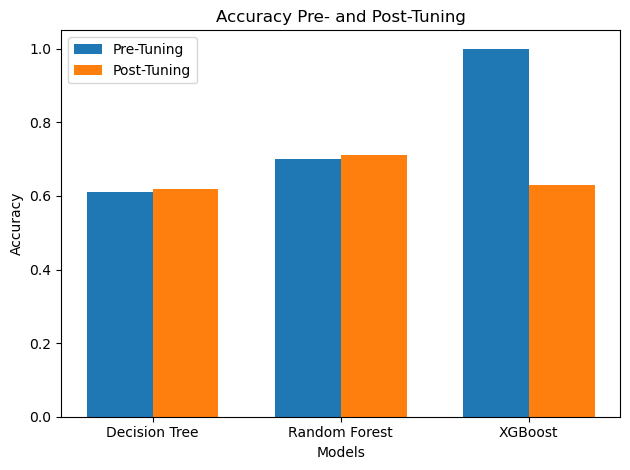

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
models = ['Decision Tree', 'Random Forest', 'XGBoost']
pre_tuning = [0.61, 0.70, 1.00]  # Example accuracy pre-tuning
post_tuning = [0.62, 0.71, 0.63]  # Example accuracy post-tuning

x = np.arange(len(models))
width = 0.35

fig, ax = plt.subplots()
ax.bar(x - width/2, pre_tuning, width, label='Pre-Tuning')
ax.bar(x + width/2, post_tuning, width, label='Post-Tuning')

ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy Pre- and Post-Tuning')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

plt.tight_layout()
plt.show()

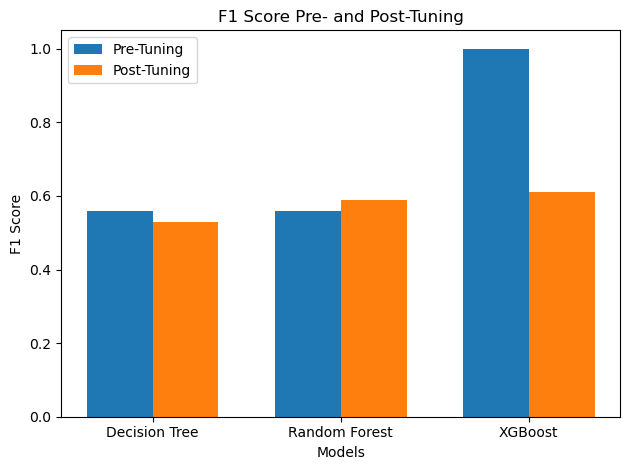

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
f1_models = ['Decision Tree', 'Random Forest', 'XGBoost']
pre_tuning = [0.56, 0.56, 1.00]  # Example accuracy pre-tuning
post_tuning = [0.53, 0.59, 0.61]  # Example accuracy post-tuning

x = np.arange(len(models))
width = 0.35

fig, ax = plt.subplots()
ax.bar(x - width/2, pre_tuning, width, label='Pre-Tuning')
ax.bar(x + width/2, post_tuning, width, label='Post-Tuning')

ax.set_xlabel('Models')
ax.set_ylabel('F1 Score')
ax.set_title('F1 Score Pre- and Post-Tuning')
ax.set_xticks(x)
ax.set_xticklabels(f1_models)
ax.legend()

plt.tight_layout()
plt.show()
